<a href="https://colab.research.google.com/github/Reinaldos/Reinaldos/blob/main/Pr%C3%B3j_5_Perguntas_7%2C_8_e_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7. Qual é o valor total de gastos por estado?

# Importação de todas as bibliotecas

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.ticker import StrMethodFormatter
from sklearn.preprocessing import MinMaxScaler

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Importação dos arquivos direto do meu google Drive

In [4]:
dfparlamentar2019 = pd.read_csv('/content/drive/My Drive/Ano-2019.csv', sep = ';')
dfparlamentar2020 = pd.read_csv('/content/drive/My Drive/Ano-2020.csv', sep = ';')
dfparlamentar2021 = pd.read_csv('/content/drive/My Drive/Ano-2021.csv', sep = ';')

# Concatenando os dataframes dos anos de 2019 e 2020 utilizando merge e atribuindo à variável df_parlamentar.

In [5]:
df_parlamentar = pd.merge(dfparlamentar2019, dfparlamentar2020, how='outer')

# Concatenando os dataframes df_parlamentar e dfparlamentar2021 utilizando merge e atribuindo à nova variável dfparlamentar.

In [6]:
dfparlamentar = pd.merge(df_parlamentar, dfparlamentar2021, how='outer')
dfparlamentar

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1554246,NaN,NaN,2812,6738121,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570078,NaN,NaN,2812,6769606,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570503,NaN,NaN,2812,6771099,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1579375,NaN,NaN,2812,6793690,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1590980,NaN,NaN,2812,6821674,http://camara.leg.br/cota-parlamentar/nota-fis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555495,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1781785,NaN,NaN,3486,7228378,https://www.camara.leg.br/cota-parlamentar/doc...
555496,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1785880,NaN,NaN,3486,7237484,https://www.camara.leg.br/cota-parlamentar/doc...
555497,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1782000,NaN,NaN,3486,7228945,https://www.camara.leg.br/cota-parlamentar/doc...
555498,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,10,TELEFONIA,...,2021,0,NaN,NaN,0,0.0,NaN,3486,0,NaN


#Informação sobre os dados do DataFrame parlamentares apenas concatenado os 3 anos. Sem nenhuma limpeza.

In [7]:
dfparlamentar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555500 entries, 0 to 555499
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          555500 non-null  object 
 1   cpf                        553661 non-null  float64
 2   ideCadastro                553759 non-null  float64
 3   nuCarteiraParlamentar      553759 non-null  float64
 4   nuLegislatura              555500 non-null  int64  
 5   sgUF                       553759 non-null  object 
 6   sgPartido                  553759 non-null  object 
 7   codLegislatura             555500 non-null  int64  
 8   numSubCota                 555500 non-null  int64  
 9   txtDescricao               555500 non-null  object 
 10  numEspecificacaoSubCota    555500 non-null  int64  
 11  txtDescricaoEspecificacao  136177 non-null  object 
 12  txtFornecedor              555467 non-null  object 
 13  txtCNPJCPF                 53

codLegislatura 

# Apaguei as colunas que não tem relação com gastos de valores utilizando .drop()
Ps:. Apaguei somente da tabela dfparlamentar que está apenas concatenada.

In [8]:
parlamentar_drop_colunas = dfparlamentar.drop(columns=['ideCadastro', 'nuCarteiraParlamentar', 'nuLegislatura', 'numParcela', 'datEmissao', 'codLegislatura', 'numEspecificacaoSubCota', 'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento', 'txtPassageiro', 'numLote', 'numRessarcimento', 'nuDeputadoId', 'ideDocumento', 'urlDocumento'])
parlamentar_drop_colunas
# Da linha 15 até a linha 878 é só liderança de partidos.

,txNomeParlamentar,cpf,sgUF,sgPartido,numSubCota,txtDescricao,txtDescricaoEspecificacao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,txtTrecho,vlrRestituicao
0,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,111.30,0.0,111.30,1,2019,NaN,NaN
1,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,117.19,0.0,117.19,2,2019,NaN,NaN
2,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,120.15,0.0,120.15,2,2019,NaN,NaN
3,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,151.18,0.0,151.18,3,2019,NaN,NaN
4,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,119.90,0.0,119.90,5,2019,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555495,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,5000.00,0.0,5000.00,7,2021,NaN,NaN
555496,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,7000.00,0.0,7000.00,8,2021,NaN,NaN
555497,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,4000.00,0.0,4000.00,7,2021,NaN,NaN
555498,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,10,TELEFONIA,NaN,1.10,0.0,1.10,7,2021,NaN,NaN


# Filtro da coluna vlLiquido exibindo somente o que for >0.

In [9]:
liq_valor_positivo = parlamentar_drop_colunas[parlamentar_drop_colunas['vlrLiquido']>0]
liq_valor_positivo

,txNomeParlamentar,cpf,sgUF,sgPartido,numSubCota,txtDescricao,txtDescricaoEspecificacao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,txtTrecho,vlrRestituicao
0,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,111.30,0.0,111.30,1,2019,NaN,NaN
1,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,117.19,0.0,117.19,2,2019,NaN,NaN
2,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,120.15,0.0,120.15,2,2019,NaN,NaN
3,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,151.18,0.0,151.18,3,2019,NaN,NaN
4,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,119.90,0.0,119.90,5,2019,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555495,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,5000.00,0.0,5000.00,7,2021,NaN,NaN
555496,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,7000.00,0.0,7000.00,8,2021,NaN,NaN
555497,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,4000.00,0.0,4000.00,7,2021,NaN,NaN
555498,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,10,TELEFONIA,NaN,1.10,0.0,1.10,7,2021,NaN,NaN


In [10]:
liq_valor_positivo.info() 
# 1.741 sgUF sem UF
# 1.741 sgPartido sem partido

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521568 entries, 0 to 555499
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          521568 non-null  object 
 1   cpf                        519754 non-null  float64
 2   sgUF                       519827 non-null  object 
 3   sgPartido                  519827 non-null  object 
 4   numSubCota                 521568 non-null  int64  
 5   txtDescricao               521568 non-null  object 
 6   txtDescricaoEspecificacao  136110 non-null  object 
 7   vlrDocumento               521568 non-null  float64
 8   vlrGlosa                   521568 non-null  float64
 9   vlrLiquido                 521568 non-null  float64
 10  numMes                     521568 non-null  int64  
 11  numAno                     521568 non-null  int64  
 12  txtTrecho                  94860 non-null   object 
 13  vlrRestituicao             0 

# O vlrLiquido expõe o gasto total por estado em ordem decrescente.

In [11]:
gasto_total_estado = liq_valor_positivo.groupby('sgUF').sum().sort_values('vlrLiquido', ascending=False).reset_index()
gasto_total_estado.head(11)

,sgUF,cpf,numSubCota,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,vlrRestituicao
0,SP,1.694832e+15,16439423,56282744.39,214041.99,56018765.12,480852,161273341,0.0
1,MG,2.304158e+15,11349030,44605662.58,209994.19,44332329.78,387127,127831011,0.0
2,BA,1.114234e+15,8957044,42074737.21,215105.68,41814441.90,244971,82114974,0.0
3,RJ,1.258920e+15,11674160,39676968.16,159295.89,39462315.62,282061,94992215,0.0
4,PR,1.322274e+15,7491246,28345046.12,139216.67,28143234.00,237590,80277548,0.0
5,RS,1.880056e+15,6760552,27006226.84,134484.32,26809293.87,284905,93666331,0.0
6,PE,7.815938e+14,5679527,24316837.82,130746.33,24178001.35,152115,51299730,0.0
7,CE,7.656823e+14,5453703,23924760.69,92832.80,23773169.28,107211,35640656,0.0
8,MA,5.740550e+14,3165590,19373234.95,120505.39,19240191.49,79944,26503930,0.0
9,PA,2.963157e+14,3874926,17915992.66,84076.52,17817430.51,76131,25830474,0.0


In [118]:
gasto_total_estado[['sgUF','vlrLiquido']].groupby(['sgUF']).sum().sort_values(by=['vlrLiquido'], ascending = False).reset_index()

,sgUF,vlrLiquido
0,SP,56018765.12
1,MG,44332329.78
2,BA,41814441.90
3,RJ,39462315.62
4,PR,28143234.00
5,RS,26809293.87
6,PE,24178001.35
7,CE,23773169.28
8,MA,19240191.49
9,PA,17817430.51


In [124]:
varVariavel = gasto_total_estado['vlrLiquido'] / 100000
varVariavel.round(2)

0     560.19
1     443.32
2     418.14
3     394.62
4     281.43
5     268.09
6     241.78
7     237.73
8     192.40
9     178.17
10    144.41
11    131.08
12    107.08
13    106.69
14    105.66
15     95.71
16     90.82
17     88.50
18     85.21
19     84.49
20     84.47
21     83.55
22     82.11
23     73.71
24     71.06
25     62.68
26     43.28
Name: vlrLiquido, dtype: float64

# Gráfico exibindo os estado com gastos do maior para o menor. 

[Text(0, 0, 'SP'),
 Text(0, 0, 'MG'),
 Text(0, 0, 'BA'),
 Text(0, 0, 'RJ'),
 Text(0, 0, 'PR'),
 Text(0, 0, 'RS'),
 Text(0, 0, 'PE'),
 Text(0, 0, 'CE'),
 Text(0, 0, 'MA'),
 Text(0, 0, 'PA'),
 Text(0, 0, 'GO'),
 Text(0, 0, 'PB'),
 Text(0, 0, 'PI'),
 Text(0, 0, 'AC'),
 Text(0, 0, 'SC'),
 Text(0, 0, 'AP'),
 Text(0, 0, 'AM'),
 Text(0, 0, 'AL'),
 Text(0, 0, 'RR'),
 Text(0, 0, 'SE'),
 Text(0, 0, 'ES'),
 Text(0, 0, 'TO'),
 Text(0, 0, 'RN'),
 Text(0, 0, 'MT'),
 Text(0, 0, 'MS'),
 Text(0, 0, 'RO'),
 Text(0, 0, 'DF')]

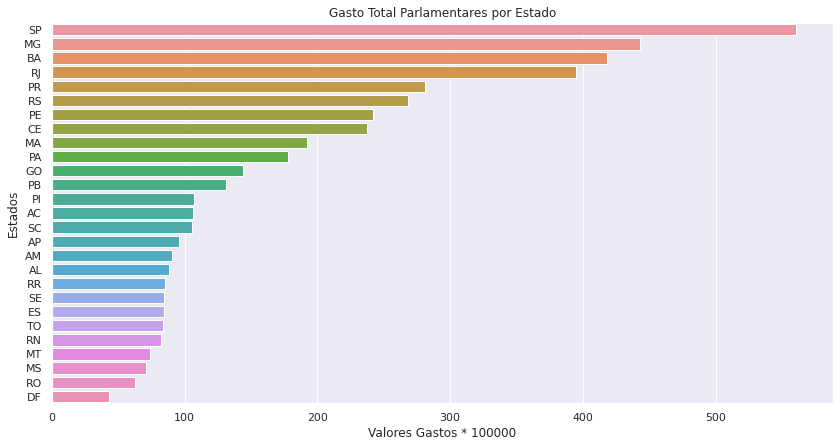

In [130]:
plt.figure(figsize=(14,7))
sns.set_style('darkgrid')
graf = sns.barplot(data = gasto_total_estado, x=varVariavel, y='sgUF', orient='h')
graf.set(xlabel = 'Valores Gastos * 100000', ylabel = 'Estados', title ='Gasto Total Parlamentares por Estado')
graf.set_yticklabels(labels = gasto_total_estado['sgUF'])

*******************************************************************************

# 8. Quais estados têm maior número de representantes? 

#Dropei nomes duplicados pra somar quantidade de parlamentares por estado. 
Eliminei todos os nomes duplicados de parlamentares utilizando o .drop_duplicate() restando apenas 846 linhas de 555500 que haviam antes. 
Embora hajam 15 nomes sem sigla UF, sua soma ainda será irrelevante pois mesmo somando ao segundo estado com mais número de parlamentares, este ainda não ultrapassa o primeiro estado que é SP.

In [47]:
representante_por_uf = parlamentar_drop_colunas[['txNomeParlamentar', 'sgUF']].drop_duplicates().reset_index()
representante_por_uf

,index,txNomeParlamentar,sgUF
0,0,LID.GOV-CD,NaN
1,15,LIDERANÇA DO AVANTE,NaN
2,64,LIDERANÇA DO CIDADANIA,NaN
3,114,LIDERANÇA DO DEMOCRATAS,NaN
4,124,LIDERANÇA DO NOVO,NaN
...,...,...,...
841,555185,Rafafá,PB
842,555279,Paulo Vicente Caleffi,RS
843,555374,Totonho Lopes,CE
844,555469,Henrique do Paraíso,SP


#Exibindo número de parlamentares por estado

In [48]:
parlamentar_por_uf = representante_por_uf.groupby('sgUF').count().sort_values('txNomeParlamentar', ascending=False).reset_index()
parlamentar_por_uf.drop(columns = ['index'], inplace = True)
parlamentar_por_uf

,sgUF,txNomeParlamentar
0,SP,104
1,RJ,82
2,MG,81
3,BA,56
4,RS,47
5,PR,46
6,CE,39
7,PE,38
8,MA,34
9,SC,30


# Gráfico com quantidade de parlamentares por estado exibindo SP com a maior quantidade.

Text(0, 0.5, 'Quantidade de parlamentar por UF')

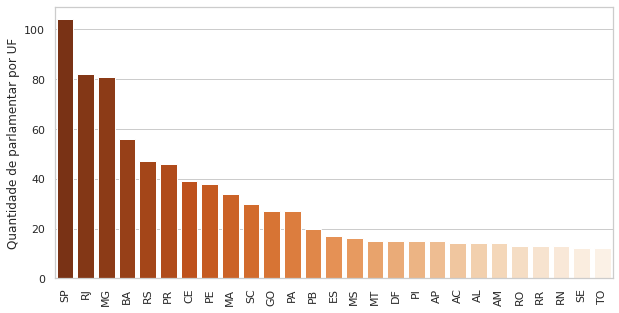

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(data = parlamentar_por_uf, x='sgUF', y='txNomeParlamentar', palette = "Oranges_r")
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Quantidade de parlamentar por UF') # legenda lateral

*******************************************************************************

# Juntei as colunas sgUF, txNomeParlamentar e vlrLiquido pra dar início a normalização

In [62]:
parl_liq_estado = pd.merge(parlamentar_por_uf, gasto_total_estado, on = 'sgUF').drop(columns = ['cpf', 'numSubCota', 'vlrDocumento', 'vlrGlosa', 'numMes', 'numAno', 'vlrRestituicao']).rename(columns={'txNomeParlamentar': 'Parlamentar Estado'}).reset_index()

parl_liq_estado

,index,sgUF,Parlamentar Estado,vlrLiquido
0,0,SP,104,56018765.12
1,1,RJ,82,39462315.62
2,2,MG,81,44332329.78
3,3,BA,56,41814441.90
4,4,RS,47,26809293.87
5,5,PR,46,28143234.00
6,6,CE,39,23773169.28
7,7,PE,38,24178001.35
8,8,MA,34,19240191.49
9,9,SC,30,10565669.91


In [63]:
scaler_01 = MinMaxScaler() 

dados_normalizados = scaler_01.fit_transform(parl_liq_estado[['Parlamentar Estado', 'vlrLiquido']])
dados_normalizados

array([[1.        , 1.        ],
       [0.76086957, 0.67970429],
       [0.75      , 0.773918  ],
       [0.47826087, 0.72520776],
       [0.38043478, 0.43492302],
       [0.36956522, 0.460729  ],
       [0.29347826, 0.37618714],
       [0.2826087 , 0.38401889],
       [0.23913043, 0.28849362],
       [0.19565217, 0.12067913],
       [0.16304348, 0.19565257],
       [0.16304348, 0.26096935],
       [0.08695652, 0.16986335],
       [0.05434783, 0.07968745],
       [0.04347826, 0.05375499],
       [0.0326087 , 0.0588749 ],
       [0.0326087 , 0.        ],
       [0.0326087 , 0.12343884],
       [0.0326087 , 0.10143748],
       [0.02173913, 0.12267046],
       [0.02173913, 0.08749136],
       [0.02173913, 0.09197703],
       [0.01086957, 0.03752816],
       [0.01086957, 0.08112886],
       [0.01086957, 0.07513204],
       [0.        , 0.0797242 ],
       [0.        , 0.0779106 ]])

# Normalização em dataframe

In [64]:
dados_normalizados2 = pd.DataFrame(dados_normalizados)
dados_normalizados2.rename(columns={0:'Numero_de_representantes_uf', 1:'Total_de_Gastos'}, inplace=True)
dados_normalizados2

,Numero_de_representantes_uf,Total_de_Gastos
0,1.000000,1.000000
1,0.760870,0.679704
2,0.750000,0.773918
3,0.478261,0.725208
4,0.380435,0.434923
5,0.369565,0.460729
6,0.293478,0.376187
7,0.282609,0.384019
8,0.239130,0.288494
9,0.195652,0.120679


# Exibindo correlação muito alta já que 1 e 0,98 estão positivamente muito próximas.

In [65]:
dados_normalizados_var = dados_normalizados2.corr()
dados_normalizados_var

,Numero_de_representantes_uf,Total_de_Gastos
Numero_de_representantes_uf,1.000000,0.972658
Total_de_Gastos,0.972658,1.000000


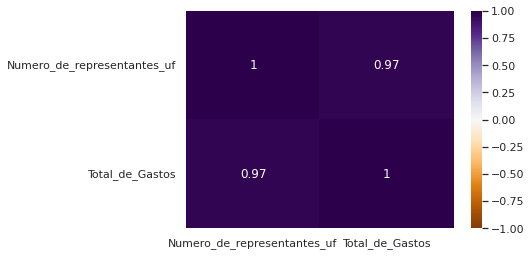

In [66]:
sns.heatmap(dados_normalizados_var, 
        xticklabels= dados_normalizados_var.columns,
        yticklabels= dados_normalizados_var.columns, annot=True, cmap="PuOr", vmin=-1, vmax=1)
print()